In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### LOAD THE BOSTON HOUSE PRICING DATSET

In [17]:
from sklearn.datasets import fetch_openml

In [19]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame  # Convert to a DataFrame


In [21]:
boston_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [33]:
print (boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [39]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [41]:
print(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [43]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Preaparing The DataSet

In [54]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [52]:
datadataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [56]:
dataset['Price']=boston.target

In [58]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


### Summarizing the Stats of Data

In [63]:
dataset.describe() #all the numerical data of independent data is foud 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


### CHEXK THE MISSING VALUES

In [68]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### EXLORATORY DATA ANALYSIS
### Correlation

In [72]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

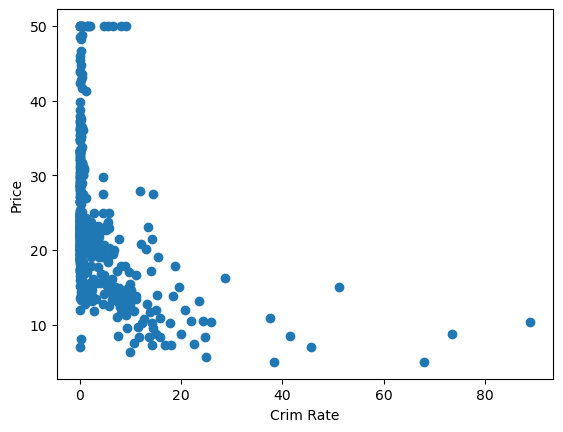

In [99]:
plt.scatter(dataset['CRIM'],dataset['Price'])

plt.xlabel("Crim Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

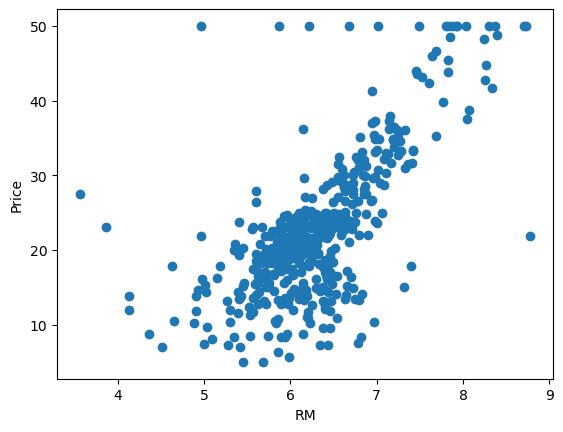

In [101]:
plt.scatter(dataset['RM'],dataset['Price'])

plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

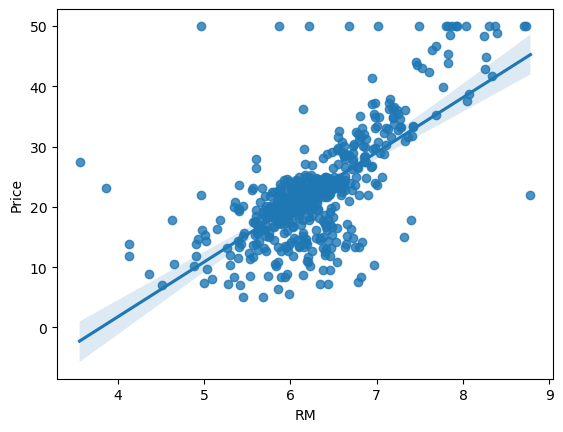

In [109]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

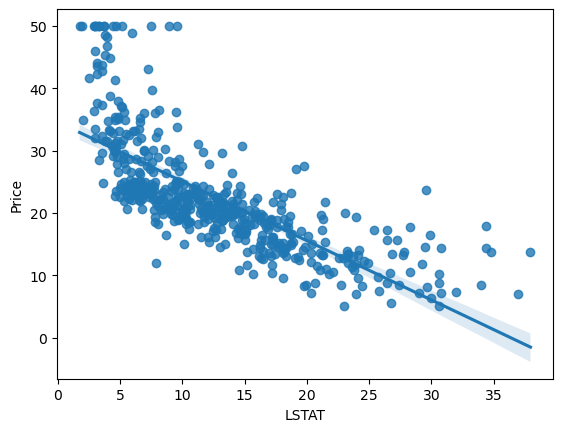

In [111]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

In [115]:
sns.regplot(x="CHAS",y="Price",data=dataset)

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


<Axes: xlabel='PTRATIO', ylabel='Price'>

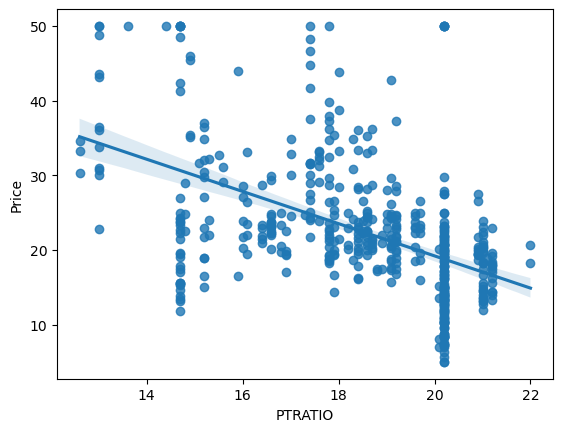

In [118]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

### MODEL CREATION 

In [3]:
#independent and dependent feature

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.datasets import fetch_openml
import pandas as pd


In [25]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame  # This is the DataFrame containing the data


In [28]:
# If you want to create `x` and `y` variables:
x = boston_df.iloc[:, :-1]  # All features except the target
y = boston_df.iloc[:, -1]   # Target variable

In [30]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [44]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [48]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [56]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
x_train=scaler.fit_transform(x_train)

In [62]:
x_test=scaler.transform(x_test)

In [64]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [66]:
x_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [90]:
#We use the standaradization in linear regression because internally in LR we use gradient descent to come to the global minima so we need all the independent feature of the model should be in same scale bc z of this convergence will happpen quickly
#standardize the data set
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

### MODEL TRAINING

In [71]:
from sklearn.linear_model import LinearRegression

In [73]:
regression=LinearRegression()

In [75]:
regression.fit(x_train,y_train)

LinearRegression()

In [93]:
#print the coefficient and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [97]:
print(regression.intercept_)

23.01581920903955


In [99]:
#ON WHich parameter the modelhas been trained.
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [101]:
#Prediction with Test data
reg_pred=regression.predict(x_test)

In [103]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

#whenever we get the predicted value we can compare it with the actual/true value for x-tset ,y_test is the true value
### ASSUMPTIONS

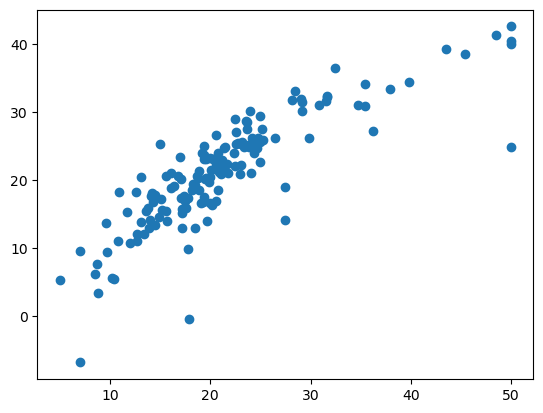

In [109]:
plt.scatter(y_test,reg_pred)
#here we can see our model is linear it means the truth value and the prediction are almost same so our model has performed well

In [111]:
#residuals basically means errors .here, we will find out the actual value and reg_pred

In [113]:
residuals=y_test-reg_pred

In [119]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: MEDV, Length: 152, dtype: float64

In [121]:
#plot this residuals

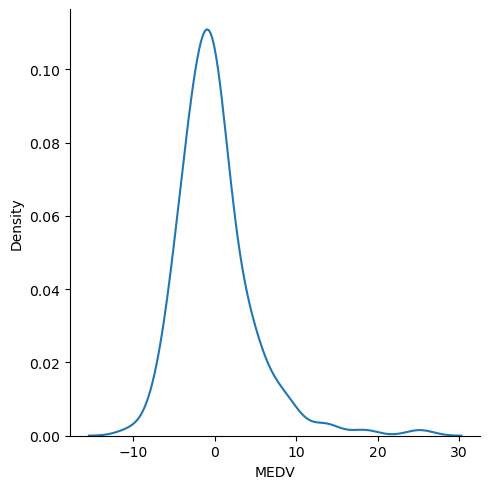

In [139]:
import seaborn as sns
sns.displot(residuals,kind="kde")
#here, when we r plotting the residuals ,we are getting a normal distributionn with some differences but most differences are in between-10 to +10

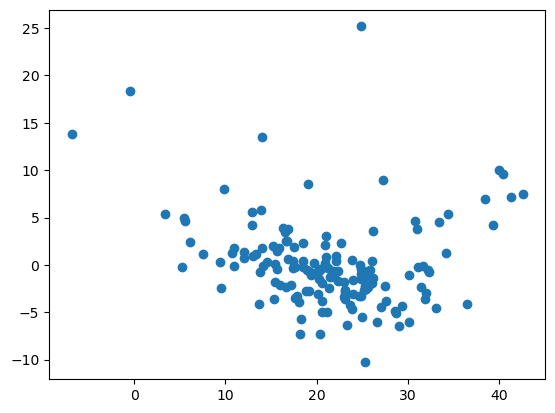

In [129]:
#Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)
#here, we r plotting errors and predicted values
#uniform distribution is there between errors and predictons

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# all these values shows how my model is performing

In [137]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.162709871457406
21.51744423117722
4.638689926172821


#performance metrics: r square and adjusted r square
### R square and ajusted R square

###formula =1-SSR/SST
###r^2=coefficient of determination, SSR=sum of squares of residuals,SST=Total Sum of Squares

In [151]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
#here, we gettig the score 71 which is good,more it is towards 1,more better the score we will get

0.7112260057484932


### Adjusted R square=1-[(1-R2)*(n-1)/(n-k-1)]
### where,r2=the r2 of model ,n: the no.of observation,k:The no. of predictor values 

In [155]:
#display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6840226584639308

In [157]:
#adjusted r square is always less than r squared


### New Data Prediction

In [167]:
#we are going to take the new data and probably do the prediction through our regression model and see what output we r getting,
#we can get the prediction of data points in a bulk or in single  

In [17]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [19]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame  # Convert to a DataFrame


In [20]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [23]:
# Reshape the first row of boston_df as a 2D array
first_row_reshaped = boston_df.iloc[0].values.reshape(1, -1)

print(first_row_reshaped)


[[0.00632 18.0 2.31 '0' 0.538 6.575 65.2 4.09 '1' 296.0 15.3 396.9 4.98]]


In [31]:
#transformation of new data
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()
# Fit and transform the feature columns (all columns except the target 'MEDV')
scaled_features = scaler.fit_transform(boston_df.iloc[:, :-1])

# Example: Transforming the first row of the DataFrame (as an array for consistency)
first_row_scaled = scaler.transform(boston_df.iloc[0, :-1].values.reshape(1, -1))
print("Scaled first row:", first_row_scaled)

Scaled first row: [[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:

regression.predict(scaler.transform(boston_df.iloc[0, :-1].values.reshape(1, -1)))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([9.05300201])

### Pickling the Model File for Deployment

In [47]:
import pickle #pickle is a serialized file that can be deployed in any server

In [53]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [55]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [61]:
#prediction
pickled_model.predict(scaler.transform(boston_df.iloc[0, :-1].values.reshape(1, -1)))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([9.05300201])